<a href="https://colab.research.google.com/github/Dorothy-K/hyperparameter_tuning/blob/main/OPLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install pyopls
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16445051711741818643, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14509932544
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7463682996798193963
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [3]:
#importing modules necessary
import numpy as np
import pandas as pd
import glob
import math

#importing modules required for processing spectra
from scipy.signal import savgol_filter
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

#import modelling packages
from sklearn.model_selection import cross_val_predict, train_test_split, LeaveOneOut
from sklearn import model_selection
from sklearn.cross_decomposition import PLSRegression
#from pyopls import OPLS
# from sklearn.linear_model import LinearRegression
# from sklearn.svm import SVR
# from sklearn.model_selection import GridSearchCV
# from sklearn.decomposition import PCA

#importing essential package to make a pipeline
from sklearn.pipeline import make_pipeline

#importing visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns

#importing metrics
from sklearn.metrics import roc_curve, roc_auc_score, r2_score, mean_squared_error, mean_absolute_error, accuracy_score

#ignoring warning
import warnings
warnings.filterwarnings('ignore')

In [4]:
model_dataset = pd.read_csv('merged_cleaned.csv')

In [5]:
model_dataset.shape

(240, 805)

In [6]:
X = model_dataset[model_dataset.columns[4:]]
print(X.shape)
y = model_dataset.iloc[:,3]
print(y.shape)

(240, 801)
(240,)


In [7]:
spectra = X
target = y

In [8]:
# # opls = OPLS(39)
# #Z = opls.fit_transform(spectra, target)

# # pls = PLSRegression(1)
# # y_pred = cross_val_predict(pls, spectra, target, cv=LeaveOneOut())
# # q_squared = r2_score(target, y_pred)  # -0.107
# # dq_squared = r2_score(target, np.clip(y_pred, -1, 1))  # -0.106
# # #accuracy = accuracy_score(target, np.sign(y_pred))  # 0.705

# # processed_y_pred = cross_val_predict(pls, Z, target, cv=LeaveOneOut())
# # processed_q_squared = r2_score(target, processed_y_pred)  # 0.981
# # processed_dq_squared = r2_score(target, np.clip(processed_y_pred, -1, 1))  # 0.984
# # #processed_accuracy = accuracy_score(target, np.sign(processed_y_pred))  # 1.0

# # r2_X = opls.score(spectra)  # 7.8e-12 (most variance is removed)

# N_comp = len(X)
# mse = []
# mae = []
# rmse = []
# r_sqaure = []
# component = np.arange(1, N_comp)

# for i in component:
#     opls = OPLS(i)
#     Z = opls.fit_transform(spectra, target)
#     pls = PLSRegression(1)
#     # Cross-validation
#     y_cv = cross_val_predict(pls, Z, target, cv=LeaveOneOut())
#     #calculate and append metrix
#     score = -1*model_selection.cross_val_score(pls, Z, y, cv=LeaveOneOut(), scoring='neg_mean_squared_error').mean()
#     mse.append(score)
#     #mse.append(mean_squared_error(y, y_cv))
#     #calculate and append MAE
#     mae.append(mean_absolute_error(y, y_cv))
#     rmse.append(math.sqrt(mean_squared_error(y, y_cv)))
#     r_sqaure.append(r2_score(y, y_cv))

#     comp = 100*(i+1)/N_comp
# # Calculate and print the position of minimum in MSE, MAE, RMSE
# msemin = np.argmin(mse) #+ 1
# maemin = np.argmin(mae) #+ 1
# rmsemin = np.argmin(rmse) #+ 1

# # Calculate and print the position of max r2 
# r2max = np.argmax(r_sqaure) #+ 1

# colors = ['blue', 'green', 'yellow', 'black']
# metrics_min = [msemin, maemin, rmsemin, r2max]
# metrics = [mse, mae, rmse, r_sqaure]
# m_names = ['MSE', 'MAE', 'RMSE', 'R squared']


In [9]:
# for i in range(len(metrics)):
#     with plt.style.context(('ggplot')):
#         plt.figure(figsize=(12,6))
#         plt.plot(component, np.array(metrics[i]), '-v', color = colors[i], mfc=colors[i])
#         plt.plot(component[metrics_min[i]], np.array(metrics[i])[metrics_min[i]], 'P', ms=10, mfc='red')
#         plt.axvline(x=component[metrics_min[i]], color='red', linestyle='solid',label = 'Best Components = ' + str(metrics_min[i] +1 ))
#         plt.xlabel('Number of PLS components')
#         plt.ylabel(m_names[i])
#         plt.title(m_names[i] + ' in PLSR')
#         plt.xlim(left=-1)
#         plt.legend(loc= "best")
# #     if save_plots == True:
# #         plt.savefig(path+m_names[i]+'.png')
#     plt.show()

# #print recommended number of components:
# print("Recommended number of components based on plots above: " + str(msemin+1))

In [10]:
# opls = OPLS(375)
# Z = opls.fit_transform(spectra, target)
# pls = PLSRegression(1)
# # Cross-validation
# y_cv = cross_val_predict(pls, Z, target, cv=LeaveOneOut())
# pls.score(spectra, target)

In [11]:
# import pandas as pd
# from pyopls import OPLSValidator

# df = pd.read_csv('Datasets/new_data.csv')
# X = df.iloc[:,1:-1]#model_dataset[model_dataset.columns[:]]
# print(X.shape)
# y = df.iloc[:,-1]
# print(y.shape)


In [12]:
# validator = OPLSValidator(k=-1).fit(X, y)

# Z = validator.opls_.transform(X)

In [13]:
# print(validator.feature_p_values_[:5])
# p_valuesnt(len(validator.feature_p_values_))

In [14]:
# print(validator.pls_.x_loadings_[:5])
# print(len(validator.pls_.x_loadings_))

In [15]:
# p_values = validator.feature_p_values_
# p_values.sort()

In [16]:
# loading = validator.pls_.x_loadings
# loading.sort()

In [17]:
# feature_df = pd.DataFrame()
# feature_df['Wavelength'] = df.columns[1:-1]
# feature_df['P_value'] = validator.feature_p_values_
# feature_df['Loading'] = validator.pls_.x_loadings_

In [18]:
#finding wavelengths
def wavelength_calc(dataframe):
    wave_length = []
    columns = dataframe.columns
    for i in columns:
        #if len(i.split('X')) ==2 :
        if type(i) == float:
            wave_length.append(i)
        elif len(i.split('X')) ==2 :
            wave_length.append(float(i.split('X')[1]))
            
        else:
            wave_length.append(float(i))
    return wave_length
def plotting_function(dataframe, y_axisval):
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(4)
    for i , row in dataframe.iterrows():
        plt.plot(y_axisval,row)
    plt.show()

In [19]:
#print(feature_df.loc[feature_df.feature_loading.abs().sort_values(ascending=False).index].to_markdown())  # Pandas 1.0+ required for to_markdown

Building OPLS from scratch

In [107]:
#split data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=134)

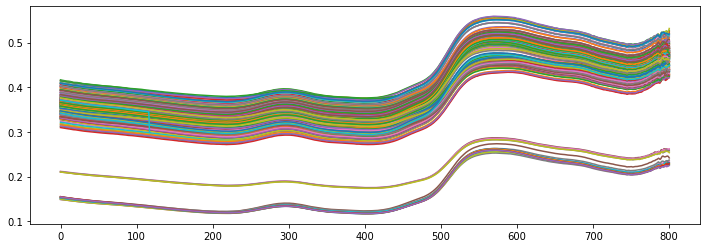

In [108]:
plotting_function(spectra, wavelength_calc(X_train))

In [109]:
pls = PLSRegression(1)
pls.fit(X_train, y_train)
y_pred = pls.predict(X_train)
q_squared = r2_score(y_train, y_pred)  # -0.107
dq_squared = r2_score(y_train, np.clip(y_pred, -1, 1)) 
print("R_square Training Before Clipping: " + str(q_squared))
print("R_square Training After Clipping : " + str(dq_squared))

R_square Training Before Clipping: 0.2584746496951429
R_square Training After Clipping : -478.47561262435966


In [111]:
#X_test = X_test.reset_index(drop=True)
X_test.isna().sum().sum()
X_test.fillna(0, inplace=True)

In [112]:
y_test_pred = pls.predict(X_test)
q_squared = r2_score(y_test, y_test_pred) 
#dq_squared = r2_score(y_test, np.clip(y_test_pred, -1, 1)) 
print("PLS Regression Validation")
print("R_square Validation Before Clipping: " + str(q_squared))
#print("R_square Validation After Clipping : " + str(dq_squared))

PLS Regression Validation
R_square Validation Before Clipping: -0.17382465978699013


In [113]:
#mean centering data
X_train_mean = X_train.mean(axis=0)
X_train -= X_train_mean

X_test_mean = X_test.mean(axis=0)
X_test -= X_test_mean

y_train_mean = y_train.mean(axis=0)
y_train -= y_train_mean


y_test_mean = y_test.mean(axis=0)
y_test -= y_test_mean

In [114]:
W_ortho = []
T_ortho = []
P_ortho = []
n_components=5
#Initialise weight vector
w = np.dot(X_train.T, y_train)  # calculate weight vector
w /= np.linalg.norm(w)  # normalize weight vector
for i in range(n_components):
    t = np.dot(X_train, w)  # scores vector
    p = np.dot(X_train.T, t) / np.dot(t.T, t).item()  # loadings of X
    w_ortho = p - np.dot(w.T, p).item() / np.dot(w.T, w).item() * w  # orthogonal weight
    w_ortho = w_ortho / np.linalg.norm(w_ortho)  # normalize orthogonal weight
    t_ortho = np.dot(X_train, w_ortho)  # orthogonal components
    p_ortho = np.dot(X_train.T, t_ortho) / np.dot(t_ortho.T, t_ortho).item()
    X_train -= np.outer(t_ortho, p_ortho.T)#
    W_ortho.append(w_ortho)
    T_ortho.append(t_ortho)
    P_ortho.append(p_ortho)

In [115]:
print(len(W_ortho))
print(len(W_ortho[0]))

5
801


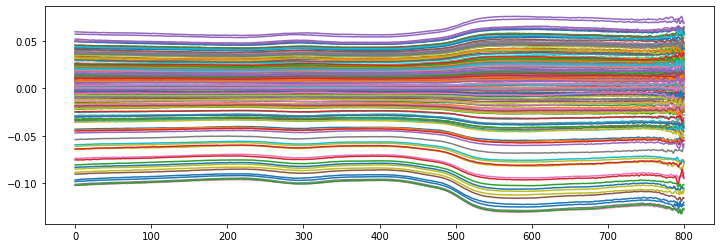

In [116]:
#plotting spectra after mean centering
plotting_function(X_train, wavelength_calc(X_train))

In [117]:
pls = PLSRegression(1)
y_pred = cross_val_predict(pls, X_train, y_train, cv=LeaveOneOut())
q_squared = r2_score(y_train, y_pred)  # -0.107
dq_squared = r2_score(y_train, np.clip(y_pred, -1, 1)) 
print(" PLS Regression after mean centering")
print("R_square Training Before Clipping: " + str(q_squared))
print("R_square Training After Clipping : " + str(dq_squared))

 PLS Regression after mean centering
R_square Training Before Clipping: 0.5944714749332982
R_square Training After Clipping : 0.5575572692874302


In [118]:
#Transforming data using 
t_ortho_new = np.dot(X_test, W_ortho[0])

In [119]:
t_ortho_new.shape

(80,)

In [120]:
p_ortho_new = np.dot(X_test.T, t_ortho_new)/ np.dot(t_ortho_new.T, t_ortho_new).item() 

In [121]:
p_ortho_new.shape

(801,)

In [122]:
X_test -= np.outer(t_ortho_new, np.transpose(p_ortho_new))

In [124]:
#X_test.isna()

In [48]:
y_test

101   -0.036125
189   -0.626125
238   -0.896125
218   -0.786125
32     0.613875
         ...   
69     0.173875
66     0.183875
132   -0.326125
127   -0.316125
4      2.243875
Name: Ash, Length: 80, dtype: float64

In [125]:
y_test_pred = cross_val_predict(pls, X_test, y_test, cv=LeaveOneOut())
q_squared = r2_score(y_test, y_test_pred) 
dq_squared = r2_score(y_test, np.clip(y_test_pred, -1, 1)) 
print(" PLS Regression Validation")
print("R_square Validation Before Clipping: " + str(q_squared))
print("R_square Validation After Clipping : " + str(dq_squared))

 PLS Regression Validation
R_square Validation Before Clipping: -0.04027850636861885
R_square Validation After Clipping : -0.03399801130818392


In [126]:
#scaling dataset
X_train_std = X_train.std(axis=0, ddof=1)
X_train_std[X_train_std == 0.0] = 1.0
X_train /= X_train_std
X_test_std = X_test.std(axis=0, ddof=1)
X_test_std[X_test_std == 0.0] = 1.0
X_test /= X_test_std
y_train_std = y_train.std(axis=0, ddof=1)
y_train /= y_train_std
y_test_std = y_test.std(axis=0, ddof=1)
y_train /= y_test_std

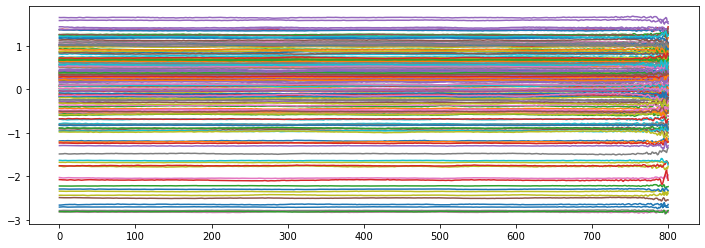

In [127]:
#plotting spectra after scaling
plotting_function(X_train, wavelength_calc(X_train))

In [128]:
W_ortho = []
T_ortho = []
P_ortho = []
n_components=5
#Initialise weight vector
w = np.dot(X_train.T, y_train)  # calculate weight vector
w /= np.linalg.norm(w)  # normalize weight vector
for i in range(n_components):
    t = np.dot(X_train, w)  # scores vector
    p = np.dot(X_train.T, t) / np.dot(t.T, t).item()  # loadings of X
    w_ortho = p - np.dot(w.T, p).item() / np.dot(w.T, w).item() * w  # orthogonal weight
    w_ortho = w_ortho / np.linalg.norm(w_ortho)  # normalize orthogonal weight
    t_ortho = np.dot(X_train, w_ortho)  # orthogonal components
    p_ortho = np.dot(X_train.T, t_ortho) / np.dot(t_ortho.T, t_ortho).item()
    X_train -= np.outer(t_ortho, p_ortho.T)#
    W_ortho.append(w_ortho)
    T_ortho.append(t_ortho)
    P_ortho.append(p_ortho)

In [129]:
pls = PLSRegression(1)
y_pred = cross_val_predict(pls, X_train, y_train, cv=LeaveOneOut())
q_squared = r2_score(y_train, y_pred) 
dq_squared = r2_score(y_train, np.clip(y_pred, -1, 1)) 
print(" PLS Regression after scaling")
print("R_square Training Before Clipping: " + str(q_squared))
print("R_square Training After Clipping : " + str(dq_squared))

 PLS Regression after scaling
R_square Training Before Clipping: 0.7872076061075678
R_square Training After Clipping : 0.5941149695238199


In [131]:
#Transforming data using 
t_ortho_new = np.dot(X_test, W_ortho[0])
p_ortho_new = np.dot(X_test.T, t_ortho_new)/ np.dot(t_ortho_new.T, t_ortho_new).item() 
X_test -= np.outer(t_ortho_new, p_ortho_new.T)

In [132]:
y_test_pred = cross_val_predict(pls, X_test, y_test, cv=LeaveOneOut())
q_squared = r2_score(y_test, y_test_pred) 
dq_squared = r2_score(y_test, np.clip(y_test_pred, -1, 1)) 
print(" PLS Regression Validation")
print("R_square Validation Before Clipping: " + str(q_squared))
print("R_square Validation After Clipping : " + str(dq_squared))

 PLS Regression Validation
R_square Validation Before Clipping: -0.04831862235917095
R_square Validation After Clipping : -0.0432304050659742
